In [27]:
!pip install pycocotools
import os
from pycocotools.coco import COCO


In [28]:
dataDir = '/kaggle/input/coco-image-caption'
dataType = 'val2017'  # or 'train2017' for training data

instances_annFile = os.path.join(dataDir, 'annotations_trainval2017/annotations/instances_{}.json'.format(dataType))
captions_annFile = os.path.join(dataDir, 'annotations_trainval2017/annotations/captions_{}.json'.format(dataType))

# Check if the paths are correct
print(os.path.exists(instances_annFile))  # Should return True
print(os.path.exists(captions_annFile))   # Should return True


True
True


In [29]:
# Initialize COCO API for instance annotations
coco = COCO(instances_annFile)

# Initialize COCO API for caption annotations
coco_caps = COCO(captions_annFile)

# Get image ids
ids = list(coco.anns.keys())
print(f"Number of annotations: {len(ids)}")


loading annotations into memory...
Done (t=0.77s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Number of annotations: 36781


http://images.cocodataset.org/val2017/000000430377.jpg


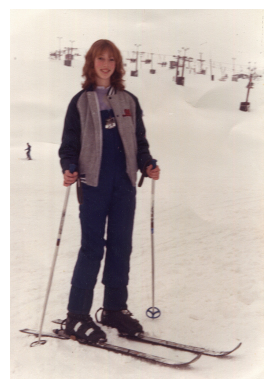

a lady that is on some skies on some snow
A woman standing on a  mountain with skis and poles.
A woman is standing in the snow wearing a pair of skis.
A woman on ski's standing in the snow.
A woman posing on skis with a ski lift in the background.


In [30]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)